In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random
import numpy as np
from datetime import datetime
from collections import Counter
from __future__ import division

from collections import Counter
from dateutil.relativedelta import relativedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors

In [2]:
def evaluate(Y_test,predict_test):
    
    confusion=metrics.confusion_matrix(Y_test, predict_test)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    specificity = TN / (TN + FP)
    print('Acuraccy:',metrics.accuracy_score(Y_test, predict_test))
    print('Confusion matrix:',confusion)
    print('TP=',TP)
    print('TN=',TN)
    print('FP=',FP)
    print('FN=',FN)
    print('classification_error',1 - metrics.accuracy_score(Y_test, predict_test))
    #print('Sensitivity',metrics.recall_score(Y_test, predict_test))
    print('Specificity',specificity)
    print('False positive rate',1 - specificity)
    #print('Precision',metrics.precision_score(Y_test, predict_test))
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC',metrics.roc_auc_score(Y_test, predict_test))

    fpr, tpr, thresholds = metrics.roc_curve(Y_test, predict_test)

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

In [3]:
def print_evaluation_metrics(trained_model,trained_model_name,X_test,y_test):
    print('--------- Model : ', trained_model_name, ' ---------------\n')
    predicted_values = trained_model.predict(X_test)
    print(metrics.classification_report(y_test,predicted_values))
    print("Accuracy Score : ",metrics.accuracy_score(y_test,predicted_values))
    print("---------------------------------------\n")

In [4]:
test = pd.read_csv("test_set_VU_DM.csv")
train = pd.read_csv("training_set_VU_DM.csv")

In [5]:
numeric_features=["prop_starrating","prop_review_score", "prop_location_score1","prop_location_score2"]

In [6]:
all_data = pd.concat([train,test], copy=False)

In [7]:
for label in numeric_features:
    mean = all_data.groupby("prop_id")[label].mean().fillna(value=-1)
    median = all_data.groupby("prop_id")[label].median().fillna(value=-1)

    for d in (train, test):
        d[label + "_mean"] = mean[d.prop_id].values
        d[label + "_median"] = median[d.prop_id].values

In [8]:
df = train

In [9]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [30]:
df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
orig_destination_distance      1607782
random_bool                          0
click_bool                           0
booking_bool                         0
prop_historical_price    

In [10]:
cols_to_drop = ['position','visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_query_affinity_score', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate', 'comp8_rate', 'comp2_inv', 'comp3_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv', 'comp8_inv', 'gross_bookings_usd']
df.drop(cols_to_drop, axis=1, inplace=True)

In [11]:
cols_to_drop2 = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_query_affinity_score', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate', 'comp8_rate', 'comp2_inv', 'comp3_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv', 'comp8_inv']
test.drop(cols_to_drop2, axis=1, inplace=True)

In [43]:
def outliers():
    cols = [
            'prop_location_score2',
            'prop_location_score1',
            'srch_booking_window',
            'price_usd',
            'prop_historical_price',
            'orig_destination_distance',
            ]
    fig, axarr = plt.subplots(figsize=(1200/120, 300/120))
   # ax = df[cols].boxplot(rot=90, return_type="axes", sym='k.', showfliers=True)
    """
    train[cols].boxplot(vert=False, sym='k.')
    plt.xscale('log')
    """
    #vals = [x.dropna() for y,x in df[cols].iteritems()]
    ax = sns.boxplot(data=df[cols], orient='h', fliersize=2)
    ax.set_xscale('log')
    plt.xlim(xmin=1e-4)
    plt.subplots_adjust(left=0.3, bottom=0.1)
    plt.savefig("outliers", dpi=400)

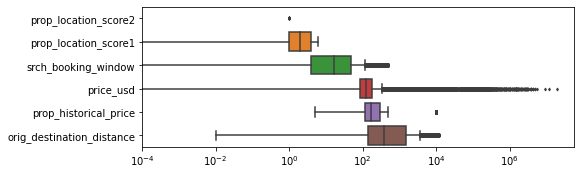

In [44]:
outliers()

In [12]:
#preproces
# sanitize prop_log_historical_price
df["prop_historical_price"] = (np.e ** df["prop_log_historical_price"]).replace(1.0, 10000)

In [13]:
test["prop_historical_price"] = (np.e ** test["prop_log_historical_price"]).replace(1.0, 10000)

In [14]:
test=test.drop(['prop_log_historical_price'], 1)

In [15]:
df=df.drop(['prop_log_historical_price'], 1)

In [16]:
# From paper "Combination of Diverse Ranking Models for Personalized Expedia Hotel Searches"
df["count_window"] = df["srch_room_count"] * max(df["srch_booking_window"]) + df["srch_booking_window"]

In [17]:
test["count_window"] = test["srch_room_count"] * max(test["srch_booking_window"]) + test["srch_booking_window"]

In [18]:
#remove outliers
df = df[df["price_usd"] < 10000]

In [17]:
df.shape

(4956353, 35)

In [18]:
test.shape

(4959183, 33)

In [19]:
def calc_fast_features(df):
    df["date_time"] = pd.to_datetime(df["date_time"])

    props = {}
    for prop in ["month", "dayofweek", "hour"]:
        props[prop] = getattr(df["date_time"].dt, prop)

    carryover = [p for p in df.columns if p not in ["date_time"]]
    for prop in carryover:
        props[prop] = df[prop]

    ret = pd.DataFrame(props)
    
    return ret


In [20]:
df=calc_fast_features(df)

In [21]:
test=calc_fast_features(test)

In [27]:
df.isnull().sum()

month                                0
dayofweek                            0
hour                                 0
srch_id                              0
site_id                              0
visitor_location_country_id          0
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7358
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1089964
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
orig_destination_distance      1606549
random_bool                          0
click_bool                           0
booking_bool             

In [26]:
test.isnull().sum()

month                                0
dayofweek                            0
hour                                 0
srch_id                              0
site_id                              0
visitor_location_country_id          0
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7266
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1088032
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
orig_destination_distance      1608679
random_bool                          0
prop_starrating_mean                 0
prop_starrating_median   

In [22]:
# fill missing values with worst case scenario. Source: Jun Wang 3rd place
# ["prop_review_score", "prop_location_score2", "orig_destination_distance"]
df = df.fillna(value=-1)
test = test.fillna(value=-1)

In [23]:
#balancing dataset
click_indices = df[df.click_bool == 1].index
random_indices = np.random.choice(click_indices, len(df.loc[df.click_bool == 1]), replace=False)
click_sample = df.loc[random_indices]

not_click = df[df.click_bool == 0].index
random_indices = np.random.choice(not_click, sum(df['click_bool']), replace=False)
not_click_sample = df.loc[random_indices]

df_new = pd.concat([not_click_sample, click_sample], axis=0)

print("Percentage of not click impressions: ", len(df_new[df_new.click_bool == 0])/len(df_new))
print("Percentage of click impression: ", len(df_new[df_new.click_bool == 1])/len(df_new))
print("Total number of records in resampled data: ", len(df_new))

Percentage of not click impressions:  0.5
Percentage of click impression:  0.5
Total number of records in resampled data:  443570


In [42]:
test.shape

(4959183, 35)

In [20]:
from sklearn.utils import resample

In [21]:
df1click=df[df.click_bool == 1]
df0click=df[df.click_bool == 0]

df1clickupsample=resample(df1click,replace=True,n_samples=4736468,random_state=1000000)
dfupsampled=pd.concat([df0click,df1clickupsample])

In [31]:
dfupsampled['click_bool'].value_counts()

1    4736468
0    4734568
Name: click_bool, dtype: int64

In [22]:
dfupsampled=dfupsampled.drop(['prop_log_historical_price'], 1)
test=test.drop(['prop_log_historical_price'], 1)

In [33]:
dfupsampled.columns

Index(['month', 'dayofweek', 'hour', 'srch_id', 'site_id',
       'visitor_location_country_id', 'prop_country_id', 'prop_id',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'booking_bool', 'prop_starrating_mean', 'prop_starrating_median',
       'prop_review_score_mean', 'prop_review_score_median',
       'prop_location_score1_mean', 'prop_location_score1_median',
       'prop_location_score2_mean', 'prop_location_score2_median',
       'prop_historical_price', 'count_window'],
      dtype='object')

In [23]:
dfupsampled=dfupsampled.drop(['srch_id','prop_id'], 1)

In [24]:
df_new=df_new.drop(['srch_id','prop_id'], 1)

In [25]:
Y1=df_new['click_bool']
Y2=df_new['booking_bool']
X=df_new.drop(['click_bool','booking_bool'], 1)


In [ ]:
Y1=dfupsampled['click_bool']
Y2=dfupsampled['booking_bool']
X=dfupsampled.drop(['click_bool','booking_bool'], 1)

In [43]:
X_train.columns


Index(['month', 'dayofweek', 'hour', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'prop_historical_price', 'count_window'],
      dtype='object')

In [49]:
Xtest.columns

NameError: name 'Xtest' is not defined

In [34]:
X_train.columns

Index(['month', 'dayofweek', 'hour', 'srch_id', 'site_id',
       'visitor_location_country_id', 'prop_country_id', 'prop_id',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'prop_starrating_mean',
       'prop_starrating_median', 'prop_review_score_mean',
       'prop_review_score_median', 'prop_location_score1_mean',
       'prop_location_score1_median', 'prop_location_score2_mean',
       'prop_location_score2_median', 'prop_historical_price', 'count_window'],
      dtype='object')

In [55]:
#y1
X_train,X_test,y_train,y_test = train_test_split(X,Y1,test_size=0.3,random_state=1)

In [56]:
#y2
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,Y2,test_size=0.3,random_state=1)

In [57]:
# make model 
rf =RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
rf.fit(X_train,y_train)
print_evaluation_metrics(rf,'Random Forests',X_test,y_test)

--------- Model :  Random Forests  ---------------

              precision    recall  f1-score   support

           0       0.63      0.67      0.65     66541
           1       0.65      0.61      0.63     66530

    accuracy                           0.64    133071
   macro avg       0.64      0.64      0.64    133071
weighted avg       0.64      0.64      0.64    133071

Accuracy Score :  0.6384336181436977
---------------------------------------



In [58]:
print_evaluation_metrics(rf,'Random Forests',X_test,y_test)

--------- Model :  Random Forests  ---------------

              precision    recall  f1-score   support

           0       0.63      0.67      0.65     66541
           1       0.65      0.61      0.63     66530

    accuracy                           0.64    133071
   macro avg       0.64      0.64      0.64    133071
weighted avg       0.64      0.64      0.64    133071

Accuracy Score :  0.6384336181436977
---------------------------------------



Acuraccy: 0.9262574114570418
Confusion matrix: [[143793  11451]
 [ 11446 143809]]
TP= 143809
TN= 143793
FP= 11451
FN= 11446
classification_error 0.07374258854295823
Specificity 0.926238695215274
False positive rate 0.07376130478472598
AUC 0.9262574107940078


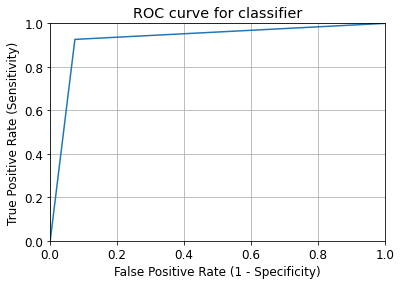

In [59]:
# train evaluation click bool
predict_train = rf.predict(X_train)
evaluate(y_train,predict_train)

Acuraccy: 0.6384336181436977
Confusion matrix: [[44535 22006]
 [26108 40422]]
TP= 40422
TN= 44535
FP= 22006
FN= 26108
classification_error 0.3615663818563023
Specificity 0.6692866052508979
False positive rate 0.3307133947491021
AUC 0.638431067543531


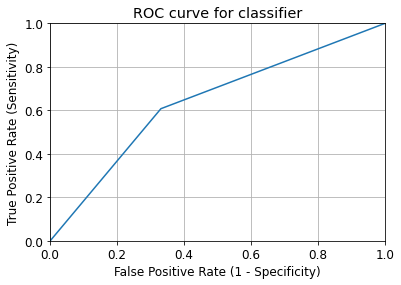

In [60]:
# test evaluation click bool
predict_test = rf.predict(X_test)
evaluate(y_test,predict_test)

In [61]:
# make model 
rf2 =RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
rf2.fit(X_train2,y_train2)
print_evaluation_metrics(rf2,'Random Forests',X_test2,y_test2)

--------- Model :  Random Forests  ---------------

              precision    recall  f1-score   support

           0       0.77      0.89      0.83     91542
           1       0.64      0.41      0.50     41529

    accuracy                           0.74    133071
   macro avg       0.70      0.65      0.66    133071
weighted avg       0.73      0.74      0.72    133071

Accuracy Score :  0.7427012647383727
---------------------------------------



Acuraccy: 0.9162863648514166
Confusion matrix: [[209375   4326]
 [ 21667  75131]]
TP= 75131
TN= 209375
FP= 4326
FN= 21667
classification_error 0.08371363514858343
Specificity 0.9797567629538467
False positive rate 0.020243237046153273
AUC 0.8779597467943887


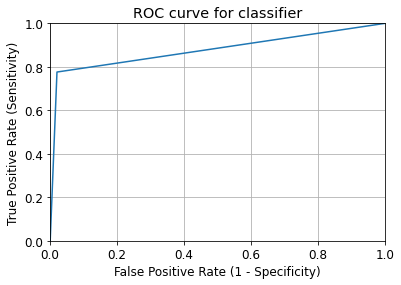

In [62]:
# train evaluation book bool
predict_train2 = rf2.predict(X_train2)
evaluate(y_train2,predict_train2)

Acuraccy: 0.7427012647383727
Confusion matrix: [[81793  9749]
 [24490 17039]]
TP= 17039
TN= 81793
FP= 9749
FN= 24490
classification_error 0.2572987352616273
Specificity 0.8935024360402876
False positive rate 0.10649756395971244
AUC 0.6518970197490561


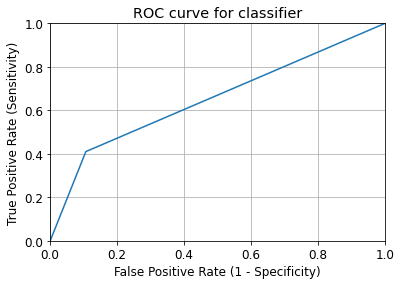

In [63]:
#train evaluation book bool
predict_test2 = rf2.predict(X_test2)
evaluate(y_test2,predict_test2)

In [31]:
Xtest=test.drop(["srch_id","prop_id"], 1)

In [ ]:
Xtest=Xtest.drop(['prop_location_score1_mean','prop_starrating_median','prop_review_score_mean', 'prop_review_score_median','prop_location_score1_mean', 'prop_location_score1_median','prop_location_score2_mean', 'prop_location_score2_median'], 1)

In [32]:
Xtest.columns

Index(['month', 'dayofweek', 'hour', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'prop_starrating_mean',
       'prop_starrating_median', 'prop_review_score_mean',
       'prop_review_score_median', 'prop_location_score1_mean',
       'prop_location_score1_median', 'prop_location_score2_mean',
       'prop_location_score2_median', 'prop_historical_price', 'count_window'],
      dtype='object')

In [33]:
X.columns

Index(['month', 'dayofweek', 'hour', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'prop_starrating_mean',
       'prop_starrating_median', 'prop_review_score_mean',
       'prop_review_score_median', 'prop_location_score1_mean',
       'prop_location_score1_median', 'prop_location_score2_mean',
       'prop_location_score2_median', 'prop_historical_price', 'count_window'],
      dtype='object')

In [49]:
Xtest.shape

(4959183, 32)

In [51]:
X_train.shape

(310499, 34)

In [86]:
Xtest.price_usd=Xtest.price_usd.astype(int)

In [87]:
Xtest.dtypes

month                            int64
dayofweek                        int64
hour                             int64
site_id                          int64
visitor_location_country_id      int64
prop_country_id                  int64
prop_starrating                  int64
prop_review_score                int32
prop_brand_bool                  int64
prop_location_score1             int32
prop_location_score2             int32
price_usd                        int32
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
orig_destination_distance      float64
random_bool                      int64
prop_historical_price          float64
count_window                     int64
prop_starrating_mean             int64
dtype: object

In [ ]:
clickBoolPred=rf.predict(Xtest)

In [ ]:
bookBoolPred=rf2.predict(Xtest)

In [ ]:
test["clickBoolPred"]=clickBoolPred

In [ ]:
test["clickBoolPred"].value_counts()

In [ ]:
test.head()

In [ ]:
test["bookBoolPred"]=bookBoolPred

In [2]:
clickboolpred = pd.read_csv("clickboolpred.csv")
bookboolpred = pd.read_csv("bookboolpred.csv")

In [3]:
clickboolpred['bookBoolPred']=bookboolpred['bookBoolPred']

In [6]:
clickboolpred.head()

,month,dayofweek,hour,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,...,prop_review_score_mean,prop_review_score_median,prop_location_score1_mean,prop_location_score1_median,prop_location_score2_mean,prop_location_score2_median,prop_historical_price,count_window,clickBoolPred,bookBoolPred
0,2,5,15,1,24,216,219,3180,3,4.5,...,4.5,4.5,2.94,2.94,0.043491,0.0691,152.933013,508,0,0
1,2,5,15,1,24,216,219,5543,3,4.5,...,4.5,4.5,2.64,2.64,0.038567,0.0106,138.379512,508,0,0
2,2,5,15,1,24,216,219,14142,2,3.5,...,3.5,3.5,2.71,2.71,0.036760,0.0556,64.071523,508,0,0
3,2,5,15,1,24,216,219,22393,3,4.5,...,4.5,4.5,2.40,2.40,0.037828,0.0561,152.933013,508,0,0
4,2,5,15,1,24,216,219,24194,3,4.5,...,4.5,4.5,2.94,2.94,0.125222,0.0712,112.168253,508,0,0


In [ ]:
clickboolpred['score'] = ( (clickboolpred["clickBoolPred"] == 1).astype(int)*1 + (clickboolpred['bookBoolPred'] == 1).astype(int)*5)

In [ ]:
clickboolpred['score'] = -clickboolpred['score']

In [ ]:
sorted_df = clickboolpred[['srch_id', 'prop_id', 'score']].sort_values(['srch_id', 'score'])

In [ ]:
sorted_df.score = -sorted_df.score

In [ ]:
test['score'] = ( (test["clickBoolPred"] == 1).astype(int)*1 + (test['bookBoolPred'] == 1).astype(int)*5)

In [ ]:
test['score'] = -test['score']

In [ ]:
sorted_df = test[['srch_id', 'prop_id', 'score']].sort_values(['srch_id', 'score'])

In [ ]:
sorted_df.score = -sorted_df.score

In [ ]:
sorted_df.head()

In [ ]:
submission = pd.DataFrame({ 'srch_id': sorted_df.srch_id, 'prop_id': sorted_df.prop_id})[['srch_id', 'prop_id']]
submission.to_csv('submision7.csv', index=False)

In [32]:
test.to_csv('bookboolpred.csv', index=False)

In [65]:
df.columns

Index(['month', 'dayofweek', 'hour', 'srch_id', 'site_id',
       'visitor_location_country_id', 'prop_country_id', 'prop_id',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'click_bool', 'booking_bool', 'prop_starrating_mean',
       'prop_starrating_median', 'prop_review_score_mean',
       'prop_review_score_median', 'prop_location_score1_mean',
       'prop_location_score1_median', 'prop_location_score2_mean',
       'prop_location_score2_median', 'count_window', 'prop_historical_price'],
      dtype='object')

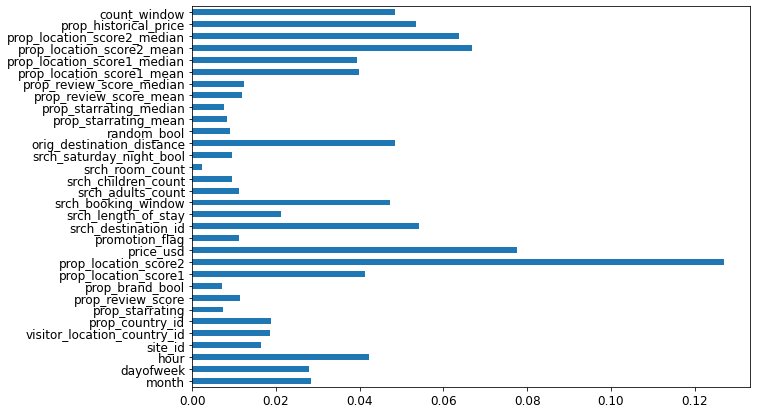

In [91]:
#clickbool
plt=(pd.Series(rf.feature_importances_, index=Xtest.columns).plot(kind='barh', figsize=(10, 7)))

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

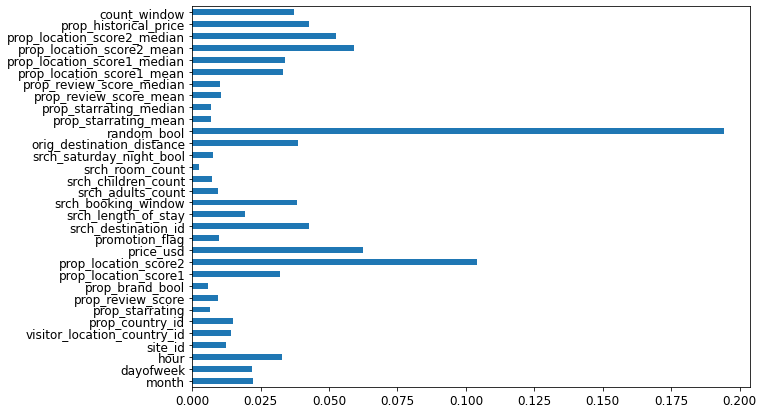

In [86]:
#bookbool
plt=(pd.Series(rf2.feature_importances_, index=Xtest.columns).plot(kind='barh', figsize=(10, 7)))


In [99]:
4736468-221879

4514589

In [36]:
df_new.shape

(443758, 37)

In [75]:
test.head()

,month,dayofweek,hour,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,...,prop_review_score_median,prop_location_score1_mean,prop_location_score1_median,prop_location_score2_mean,prop_location_score2_median,prop_historical_price,count_window,clickBoolPred,bookBoolPred,score
0,2,5,15,1,24,216,219,3180,3,4.5,...,4.5,2.94,2.94,0.043491,0.0691,152.933013,508,1,0,-1
1,2,5,15,1,24,216,219,5543,3,4.5,...,4.5,2.64,2.64,0.038567,0.0106,138.379512,508,1,1,-6
2,2,5,15,1,24,216,219,14142,2,3.5,...,3.5,2.71,2.71,0.036760,0.0556,64.071523,508,0,0,0
3,2,5,15,1,24,216,219,22393,3,4.5,...,4.5,2.40,2.40,0.037828,0.0561,152.933013,508,0,0,0
4,2,5,15,1,24,216,219,24194,3,4.5,...,4.5,2.94,2.94,0.125222,0.0712,112.168253,508,1,0,-1


In [26]:
df.isnull().sum()

month                          0
dayofweek                      0
hour                           0
srch_id                        0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
orig_destination_distance      0
random_bool                    0
click_bool                     0
booking_bool                   0
prop_starrating_mean           0
prop_starrating_median         0
prop_review_score_mean         0
prop_revie

In [27]:
test.isnull().sum()

month                          0
dayofweek                      0
hour                           0
srch_id                        0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
orig_destination_distance      0
random_bool                    0
prop_starrating_mean           0
prop_starrating_median         0
prop_review_score_mean         0
prop_review_score_median       0
prop_location_score1_mean      0
prop_locat

In [32]:
len(df.columns)

37

In [40]:
df.columns

Index(['month', 'dayofweek', 'hour', 'srch_id', 'site_id',
       'visitor_location_country_id', 'prop_country_id', 'prop_id',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'click_bool', 'booking_bool', 'prop_starrating_mean',
       'prop_starrating_median', 'prop_review_score_mean',
       'prop_review_score_median', 'prop_location_score1_mean',
       'prop_location_score1_median', 'prop_location_score2_mean',
       'prop_location_score2_median', 'count_window', 'prop_historical_price'],
      dtype='object')

In [27]:
# make model 
rf =RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
rf.fit(X,Y1)

NameError: name 'X_test' is not defined

In [28]:
# make model 
rf2 =RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
rf2.fit(X,Y2)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=3, n_estimators=51)